In [282]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dropout
import numpy as np

In [367]:
df = pd.read_excel('/Users/sindhujach/Desktop/ECE_699/Traffic_simulation/Weeklytask-7-12-23/ego_vehicle_data_only_0.xlsx') 
df

,time,id,speed,x,y,lane,angle,type,pos,slope,acceleration,nearest_vehicle_id,least_distance,relative_speed
0,50.0,ego_car,12.67,-294.90,95.20,-E29_0,90.00,ego_vehicle,5.10,0,0.0,flow_default_E.0,64.320448,2.28
1,50.1,ego_car,12.67,-293.63,95.20,-E29_0,90.00,ego_vehicle,6.37,0,0.0,flow_default_E.0,62.017521,2.14
2,50.2,ego_car,12.64,-292.37,95.20,-E29_0,90.00,ego_vehicle,7.63,0,-0.3,flow_default_E.0,59.716694,1.94
3,50.3,ego_car,12.58,-291.11,95.20,-E29_0,90.00,ego_vehicle,8.89,0,-0.6,flow_default_E.0,57.408362,1.71
4,50.4,ego_car,12.49,-289.86,95.20,-E29_0,90.00,ego_vehicle,10.14,0,-0.9,flow_default_E.0,55.083006,1.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,77.1,ego_car,25.24,-24.48,22.37,E28_0,52.81,ego_vehicle,70.15,0,1.7,flow_default_N.1,11.683942,12.85
272,77.2,ego_car,25.44,-22.48,24.02,E28_0,51.25,ego_vehicle,72.70,0,2.0,flow_default_N.1,10.346482,13.10
273,77.3,ego_car,25.67,-20.52,25.74,E28_0,49.55,ego_vehicle,75.27,0,2.3,flow_default_N.1,8.994676,13.40
274,77.4,ego_car,25.93,-18.59,27.54,E28_0,47.68,ego_vehicle,77.86,0,2.6,flow_default_N.1,7.598131,13.71


In [296]:
#Separate dates for future plotting
df['time'] = pd.to_datetime(df['time']*10000000)
df.set_index('time', inplace=True)

train_dates = df.index

df1 = df[['relative_speed','least_distance']]

<Axes: xlabel='time'>

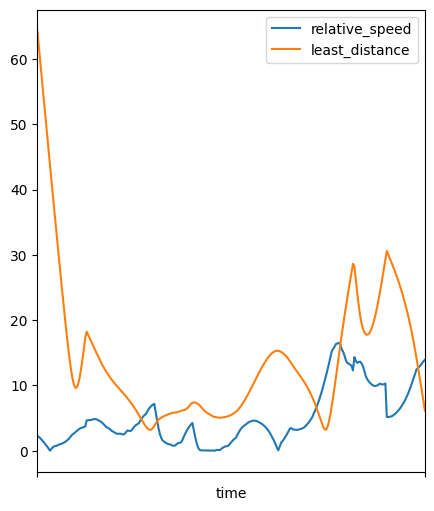

In [297]:
df1.plot(figsize=(5,6))

In [325]:
features = df[['speed', 'x', 'y', 'angle', 'pos', 'slope', 'acceleration', 'least_distance', 'relative_speed']]

In [352]:
# Normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

In [353]:
# Prepare data for LSTM
n_features = 9
def create_dataset(X, y, time_steps=3):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(X.iloc[i + time_steps].values)
    return np.array(Xs), np.array(ys)


In [354]:
df.shape[1]

13

In [355]:
# Define time_steps
time_steps = 3

In [356]:
# Reshape to [samples, time_steps, n_features]
X, y = create_dataset(pd.DataFrame(scaled_features), time_steps)


In [357]:
X.shape

(273, 3, 9)

In [358]:
# Split into training and test sets
X_train = X[:-5]
X_test = X[-5:]
y_train = y[:-5]
y_test = y[-5:]

In [359]:
X_test.shape

(5, 3, 9)

In [360]:
X_train.shape[1]

3

In [361]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences= False))
model.add(Dropout(0.2))
model.add(Dense(n_features))  # 'sigmoid' for binary classification


In [362]:
print(X_train.shape)

(268, 3, 9)


In [363]:
print(y_train.shape)

(268, 9)


In [364]:
# Compile the model
model.compile(loss= 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
9/9 [==============================] - 6s 8ms/step - loss: 3.7670 - accuracy: 0.0896
Epoch 2/50
9/9 [==============================] - 0s 12ms/step - loss: 2.3134 - accuracy: 0.0933
Epoch 3/50
9/9 [==============================] - 0s 9ms/step - loss: 1.4047 - accuracy: 0.1269
Epoch 4/50
9/9 [==============================] - 0s 9ms/step - loss: 1.0747 - accuracy: 0.1567
Epoch 5/50
9/9 [==============================] - 0s 9ms/step - loss: 0.9268 - accuracy: 0.2052
Epoch 6/50
9/9 [==============================] - 0s 9ms/step - loss: 0.8281 - accuracy: 0.1978
Epoch 7/50
9/9 [==============================] - 0s 10ms/step - loss: 0.7102 - accuracy: 0.3022
Epoch 8/50
9/9 [==============================] - 0s 11ms/step - loss: 0.6627 - accuracy: 0.2687
Epoch 9/50
9/9 [==============================] - 0s 9ms/step - loss: 0.6284 - accuracy: 0.3433
Epoch 10/50
9/9 [==============================] - 0s 12ms/step - loss: 0.6064 - accuracy: 0.3731
Epoch 11/50
9/9 [==================

In [365]:
X_test.shape

(5, 3, 9)

In [366]:
X_test[-1:]

array([[[0.85634783, 0.97929398, 0.28720208, 0.04156631, 0.51285129,
         0.        , 0.55665025, 0.11692458, 0.79237288],
        [0.86434783, 0.98633978, 0.3044262 , 0.02835832, 0.53099845,
         0.        , 0.57142857, 0.09480749, 0.81053269],
        [0.8733913 , 0.99327773, 0.32245143, 0.01382954, 0.54928682,
         0.        , 0.5862069 , 0.07195843, 0.82929782]]])

In [368]:
# Predict the next row values
n_input = X_test.shape[1]  # This should match the 'time_steps' used during training
n_features = X_test.shape[2]  # Number of features

test_predictions = []

# Iterate over each test sequence
for i in range(len(X_test)):
    # Reshape the test data to (1, n_input, n_features) before feeding into the model
    current_batch = X_test[i].reshape((1, n_input, n_features))
    
    # Get the prediction value for the current batch
    current_pred = model.predict(current_batch)[0]
    
    # Append the prediction to the test_predictions list
    test_predictions.append(current_pred)

# Convert predictions list to a numpy array (if needed)
test_predictions = np.array(test_predictions)

1/1 [==============================] - 0s 31ms/step


In [393]:
reshaped_data = test_predictions.reshape(-1, X_test.shape[2])

# Create DataFrame
pred = pd.DataFrame(reshaped_data, columns=['speed', 'x', 'y', 'angle', 'pos', 'slope', 'acceleration', 'least_distance', 'relative_speed'])

# Adding a column for TimeStep (sequential across all samples)
total_time_steps = test_predictions.shape[0] * X_test.shape[1]

pred_rounded = pred.round(6)

pred_final = pred_rounded.drop(columns=['TimeStep'], errors='ignore')

# Drop duplicates in the rounded DataFrame
pred_no_duplicates = pred_final.drop_duplicates()

test_pred = pred_no_duplicates.reset_index(drop=True)

test_pred

,speed,x,y,angle,pos,slope,acceleration,least_distance,relative_speed
0,0.702930,0.653463,0.432978,0.363213,0.586639,-0.396997,0.542426,0.212978,0.583684
1,0.690679,0.632460,0.426070,0.342752,0.614216,-0.399794,0.543815,0.199259,0.593025
2,0.675644,0.615448,0.420481,0.324365,0.636118,-0.401946,0.540769,0.185678,0.596268
3,0.680210,0.618499,0.432038,0.320793,0.652210,-0.409620,0.547064,0.178280,0.603777
4,0.685090,0.621430,0.443946,0.317016,0.668998,-0.417540,0.553557,0.170550,0.611789


In [397]:
reshaped_data = X_test.reshape(-1, X_test.shape[2])

# Create DataFrame
df = pd.DataFrame(reshaped_data, columns=['speed', 'x', 'y', 'angle', 'pos', 'slope', 'acceleration', 'least_distance', 'relative_speed'])

# Adding a column for TimeStep (sequential across all samples)
total_time_steps = X_test.shape[0] * X_test.shape[1]
df['TimeStep'] = range(total_time_steps)

df_rounded = df.round(6)

df_final = df_rounded.drop(columns=['TimeStep'], errors='ignore')

# Drop duplicates in the rounded DataFrame
df_no_duplicates = df_final.drop_duplicates()

test_actual = df_no_duplicates.reset_index(drop=True)

test_actual = test_actual.iloc[2:].reset_index(drop=True)

test_actual

,speed,x,y,angle,pos,slope,acceleration,least_distance,relative_speed
0,0.843478,0.964843,0.254857,0.067128,0.477051,0.0,0.527094,0.160122,0.763923
1,0.849391,0.972104,0.270679,0.053687,0.494845,0.0,0.541872,0.138807,0.777240
2,0.856348,0.979294,0.287202,0.041566,0.512851,0.0,0.556650,0.116925,0.792373
3,0.864348,0.986340,0.304426,0.028358,0.530998,0.0,0.571429,0.094807,0.810533
4,0.873391,0.993278,0.322451,0.013830,0.549287,0.0,0.586207,0.071958,0.829298


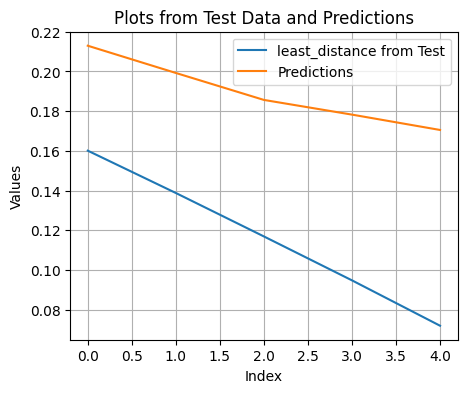

In [401]:
import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(5, 4))

# Plotting data from 'test'
plt.plot(test_actual['least_distance'], label='least_distance from Test')
# plt.plot(test['Feature2'], label='Feature2 from Test')

# Plotting data from 'true_predictions'
plt.plot(test_pred['least_distance'], label='Predictions')

plt.title('Plots from Test Data and Predictions')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

### GRU

In [408]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.model_selection import train_test_split


# Build the GRU model
gru_model = Sequential()
gru_model.add(GRU(units=50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(n_features))  # Output layer with a neuron for each feature

# Compile the model
gru_model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])  # Using Mean Squared Error loss for regression

# Train the model
gru_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)




Epoch 1/50
9/9 [==============================] - 15s 12ms/step - loss: 0.1690 - accuracy: 0.0560
Epoch 2/50
9/9 [==============================] - 0s 10ms/step - loss: 0.0871 - accuracy: 0.1978
Epoch 3/50
9/9 [==============================] - 0s 20ms/step - loss: 0.0626 - accuracy: 0.3134
Epoch 4/50
9/9 [==============================] - 0s 10ms/step - loss: 0.0530 - accuracy: 0.4851
Epoch 5/50
9/9 [==============================] - 0s 9ms/step - loss: 0.0434 - accuracy: 0.5448
Epoch 6/50
9/9 [==============================] - 0s 10ms/step - loss: 0.0361 - accuracy: 0.5448
Epoch 7/50
9/9 [==============================] - 0s 11ms/step - loss: 0.0318 - accuracy: 0.6269
Epoch 8/50
9/9 [==============================] - 0s 10ms/step - loss: 0.0281 - accuracy: 0.5933
Epoch 9/50
9/9 [==============================] - 0s 12ms/step - loss: 0.0250 - accuracy: 0.6604
Epoch 10/50
9/9 [==============================] - 0s 10ms/step - loss: 0.0235 - accuracy: 0.6493
Epoch 11/50
9/9 [============

In [412]:
# Predict the next row values
n_input = X_test.shape[1]  # This should match the 'time_steps' used during training
n_features = X_test.shape[2]  # Number of features

test_predictions_gru = []

# Iterate over each test sequence
for i in range(len(X_test)):
    # Reshape the test data to (1, n_input, n_features) before feeding into the model
    current_batch_gru = X_test[i].reshape((1, n_input, n_features))
    
    # Get the prediction value for the current batch
    current_pred_gru = gru_model.predict(current_batch_gru)[0]
    
    # Append the prediction to the test_predictions list
    test_predictions_gru.append(current_pred_gru)

# Convert predictions list to a numpy array (if needed)
test_predictions_gru = np.array(test_predictions_gru)

1/1 [==============================] - 0s 32ms/step


In [413]:
test_predictions_gru

array([[0.7791368 , 0.8939164 , 0.17861888, 0.07175168, 0.49705762,
        0.00679735, 0.60933125, 0.18521789, 0.72233063],
       [0.7632377 , 0.8899827 , 0.1868279 , 0.06024002, 0.5067935 ,
        0.00766116, 0.5507788 , 0.17479268, 0.750692  ],
       [0.75169045, 0.88321066, 0.20254503, 0.05381789, 0.51878226,
        0.0082745 , 0.5262538 , 0.16275394, 0.77064055],
       [0.755202  , 0.8864096 , 0.21415874, 0.04209933, 0.5397419 ,
        0.00850376, 0.53530294, 0.14634782, 0.7855353 ],
       [0.75908846, 0.88924164, 0.22623748, 0.02958428, 0.5611136 ,
        0.00869622, 0.54390013, 0.12964419, 0.80196184]], dtype=float32)

In [414]:
reshaped_data = test_predictions_gru.reshape(-1, X_test.shape[2])

# Create DataFrame
pred_gru = pd.DataFrame(reshaped_data, columns=['speed', 'x', 'y', 'angle', 'pos', 'slope', 'acceleration', 'least_distance', 'relative_speed'])

# Adding a column for TimeStep (sequential across all samples)
total_time_steps = test_predictions_gru.shape[0] * X_test.shape[1]

pred_rounded_gru = pred_gru.round(6)

pred_final_gru = pred_rounded_gru.drop(columns=['TimeStep'], errors='ignore')

# Drop duplicates in the rounded DataFrame
pred_no_duplicates_gru = pred_final_gru.drop_duplicates()

test_pred_gru = pred_no_duplicates_gru.reset_index(drop=True)

test_pred_gru

,speed,x,y,angle,pos,slope,acceleration,least_distance,relative_speed
0,0.779137,0.893916,0.178619,0.071752,0.497058,0.006797,0.609331,0.185218,0.722331
1,0.763238,0.889983,0.186828,0.060240,0.506794,0.007661,0.550779,0.174793,0.750692
2,0.751690,0.883211,0.202545,0.053818,0.518782,0.008274,0.526254,0.162754,0.770641
3,0.755202,0.886410,0.214159,0.042099,0.539742,0.008504,0.535303,0.146348,0.785535
4,0.759088,0.889242,0.226237,0.029584,0.561114,0.008696,0.543900,0.129644,0.801962


In [407]:
reshaped_data = X_test.reshape(-1, X_test.shape[2])

# Create DataFrame
df = pd.DataFrame(reshaped_data, columns=['speed', 'x', 'y', 'angle', 'pos', 'slope', 'acceleration', 'least_distance', 'relative_speed'])

# Adding a column for TimeStep (sequential across all samples)
total_time_steps = X_test.shape[0] * X_test.shape[1]
df['TimeStep'] = range(total_time_steps)

df_rounded = df.round(6)

df_final = df_rounded.drop(columns=['TimeStep'], errors='ignore')

# Drop duplicates in the rounded DataFrame
df_no_duplicates = df_final.drop_duplicates()

test_actual = df_no_duplicates.reset_index(drop=True)

test_actual = test_actual.iloc[2:].reset_index(drop=True)

test_actual

,speed,x,y,angle,pos,slope,acceleration,least_distance,relative_speed
0,0.843478,0.964843,0.254857,0.067128,0.477051,0.0,0.527094,0.160122,0.763923
1,0.849391,0.972104,0.270679,0.053687,0.494845,0.0,0.541872,0.138807,0.777240
2,0.856348,0.979294,0.287202,0.041566,0.512851,0.0,0.556650,0.116925,0.792373
3,0.864348,0.986340,0.304426,0.028358,0.530998,0.0,0.571429,0.094807,0.810533
4,0.873391,0.993278,0.322451,0.013830,0.549287,0.0,0.586207,0.071958,0.829298


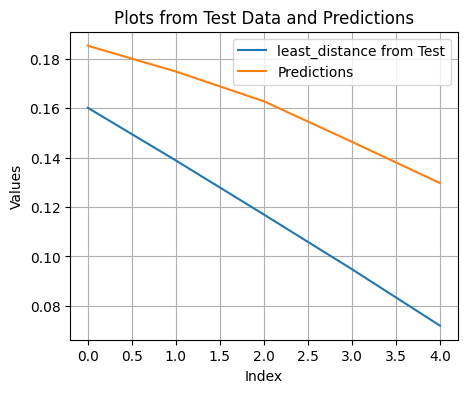

In [415]:
import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(5, 4))

# Plotting data from 'test'
plt.plot(test_actual['least_distance'], label='least_distance from Test')
# plt.plot(test['Feature2'], label='Feature2 from Test')

# Plotting data from 'true_predictions'
plt.plot(test_pred_gru['least_distance'], label='Predictions')

plt.title('Plots from Test Data and Predictions')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()